# Screened infeasibility analysis
Once a parameter screening analysis has been performed and detailed SA/UQ evaluated on the most influential uncertain parameters, this notebook analyses the results using a pre-existing database, created in the `feas_screened_eval.ipynb` notebook. This is capable of running locally, as there are only 3 uncertain parameters.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from infeas import analyse

In [2]:
campaign, samples = analyse.read_campaign(campaign_name="example_local")
samples

Reading in campaign database.
Campaign read in. Number of samples = 64


,run_id,iteration,fdene,hfact,fimp_14,coreradius,fimp_2,psepbqarmax,flhthresh,cboot,...,ineq_con060,ineq_con062,ineq_con065,ineq_con072,ineq_con079,ineq_con081,ineq_con068,ineq_con031,ineq_con032,rms_vio_constr_res
0,1,0,1.113886,1.013886,0.000016,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019016
1,2,0,1.113886,1.013886,0.000040,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020023
2,3,0,1.113886,1.013886,0.000070,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021299
3,4,0,1.113886,1.013886,0.000094,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022249
4,5,0,1.113886,1.066002,0.000016,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,60,0,1.286114,1.133998,0.000094,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004951
60,61,0,1.286114,1.186114,0.000016,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006373
61,62,0,1.286114,1.186114,0.000040,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004883
62,63,0,1.286114,1.186114,0.000070,0.75,0.1,9.0,1.15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002995


## Analysis

Check out the QOIs from the samples.

In [3]:
qois = [
    "norm_objf",
    "eq_con001",
    "eq_con002",
    "eq_con011",
    "ineq_con005",
    "ineq_con008",
    "ineq_con009",
    "ineq_con013",
    "ineq_con015",
    "ineq_con030",
    "ineq_con016",
    "ineq_con024",
    "ineq_con025",
    "ineq_con026",
    "ineq_con027",
    "ineq_con033",
    "ineq_con034",
    "ineq_con035",
    "ineq_con036",
    "ineq_con060",
    "ineq_con062",
    "ineq_con065",
    "ineq_con072",
    "ineq_con079",
    "ineq_con081",
    "ineq_con068",
    "ineq_con031",
    "ineq_con032",
    "rms_vio_constr_res",
]
samples[qois].describe()

,norm_objf,eq_con001,eq_con002,eq_con011,ineq_con005,ineq_con008,ineq_con009,ineq_con013,ineq_con015,ineq_con030,...,ineq_con060,ineq_con062,ineq_con065,ineq_con072,ineq_con079,ineq_con081,ineq_con068,ineq_con031,ineq_con032,rms_vio_constr_res
count,64.000000,64.000000,64.000000,6.400000e+01,64.0,64.0,64.0,64.0,64.0,64.0,...,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.0,64.000000
mean,-1.319325,-0.001388,0.041297,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009933
std,0.014207,0.001542,0.049620,8.537290e-22,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007435
min,-1.337900,-0.003400,-0.033111,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000511
25%,-1.329425,-0.002488,-0.000040,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003466
50%,-1.319300,-0.001389,0.039947,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008421
75%,-1.309200,-0.000290,0.080195,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015445
max,-1.300800,0.000625,0.115560,-4.611700e-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022249


### Most violated constraints

Find the most violated constraints (by mean).

Plotting violated constraint means.


Text(0, 0.5, 'Constraint')

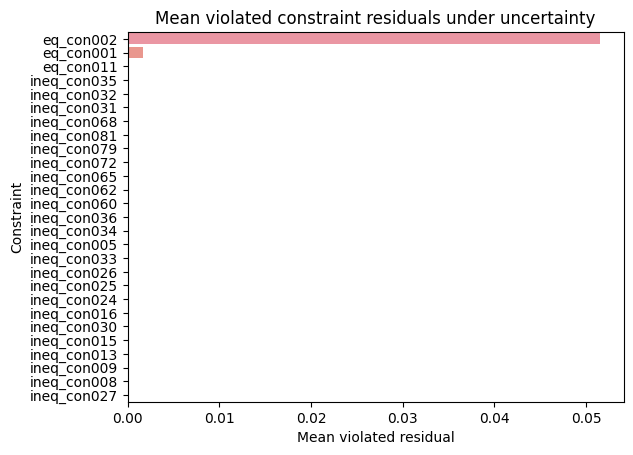

In [4]:
print("Plotting violated constraint means.")
# Get absolute values of violated constraint residuals
# Abs values before mean: be fair to eq constraints (either side of 0)
vio_means_series = samples[qois].abs().mean().sort_values(ascending=False)
vio_means = pd.DataFrame(vio_means_series, columns=["mean"])
vio_means["variable"] = vio_means.index
vio_means.reset_index(drop=True)

# Exclude objf and vio-constr_res
filter_qois = ["norm_objf", "rms_vio_constr_res"]
constrs_mask = ~vio_means["variable"].isin(filter_qois)
vio_means_filt = vio_means[constrs_mask]

# Plot
fig, ax = plt.subplots()
sns.barplot(data=vio_means_filt, x="mean", y="variable", ax=ax)
ax.set_title("Mean violated constraint residuals under uncertainty")
ax.set_xlabel("Mean violated residual")
ax.set_ylabel("Constraint")
# fig.savefig("mean_vio_constr_res.png")

Most violated by frequency. Tricky to set a threshold: probably not the best.

Plotting constraint violation freqencies.


Text(0, 0.5, 'Constraint')

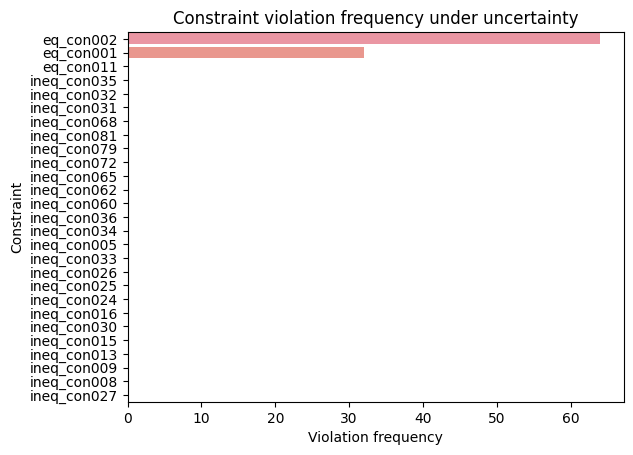

In [5]:
print("Plotting constraint violation freqencies.")
constr_tol = 1e-3
vio_counts = {}
for qoi in qois:
    # Count rows (samples) where each constraint is violated
    vio_count = samples[samples[qoi].abs() > constr_tol].shape[0]
    vio_counts[qoi] = vio_count

vio_counts
vio_counts_df = pd.DataFrame(data=vio_counts, index=[0])

vio_counts_df_melt = vio_counts_df.melt()
vio_counts_df_melt = vio_counts_df_melt.sort_values(by="value", ascending=False)
vio_counts_df_melt.reset_index(drop=True)
vio_counts_df_melt_filt = vio_counts_df_melt[
    ~vio_counts_df_melt["variable"].isin(filter_qois)
]

# # Plot
fig, ax = plt.subplots()
sns.barplot(data=vio_counts_df_melt_filt, x="value", y="variable", ax=ax)
ax.set_title("Constraint violation frequency under uncertainty")
ax.set_xlabel("Violation frequency")
ax.set_ylabel("Constraint")
# fig.savefig("vio_constr_res_freq.png")

### Distribution of violated constraint residuals

Plotting distribution of violated constraint residuals.


(0.0, 0.03536182105391679)

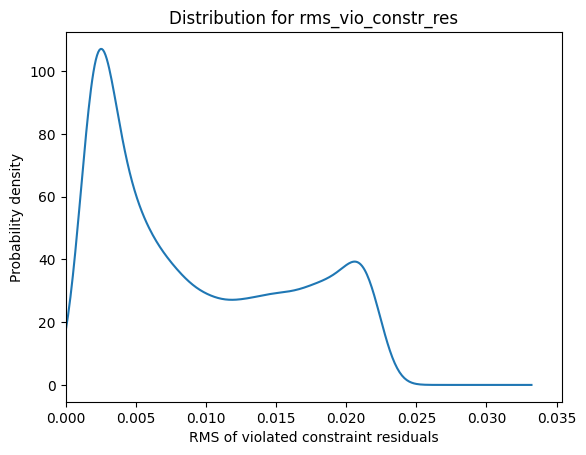

In [6]:
print("Plotting distribution of violated constraint residuals.")
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])

# Get its distribution
dist = results.get_distribution(qoi="rms_vio_constr_res")

# Locations for density function to be evaluated
# (This is taken from easyvvuq's fusion tutorial)
x = np.linspace(dist.lower[0], dist.upper[0], num=500)
pdf = dist.pdf(x)

# Plot
fig, ax = plt.subplots()
sns.lineplot(x=x, y=pdf, markers=True, ax=ax)
ax.set_title("Distribution for rms_vio_constr_res")
ax.set_xlabel("RMS of violated constraint residuals")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])
# fig.savefig("vio_constr_res_dist.png")

### Distribution of individual constraint violations

Plotting top 3 violated constraint distributions


(0.0, 0.1274280033619746)

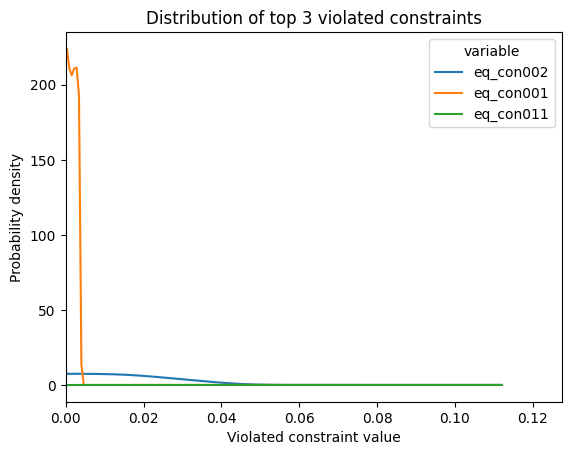

In [7]:
print("Plotting top 3 violated constraint distributions")
# Take top 3 violated contraints (by mean)
vio_means_filt = vio_means_filt.reset_index(drop=True)
top_vio_means = vio_means_filt[0:3]["variable"].to_list()

# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=top_vio_means)

# Get the distributions
dists = []
dist_lowest = 0.0
dist_highest = 0.0
for qoi in top_vio_means:
    dist = results.get_distribution(qoi=qoi)
    if dist.lower[0] < dist_lowest:
        dist_lowest = dist.lower[0]
    if dist.upper[0] > dist_highest:
        dist_highest = dist.upper[0]
    dists.append(dist)

# Locations for density function to be evaluated
x = np.linspace(dist_lowest, dist_highest, num=500)

# Flip x to make +ve
pdfs = {"x": -x}
for constr_name, dist in zip(top_vio_means, dists):
    pdfs[constr_name] = dist.pdf(x)

top_vio_means_df = pd.DataFrame(pdfs)
top_vio_means_df
top_vio_means_df_melt = top_vio_means_df.melt(id_vars="x", value_vars=top_vio_means)
top_vio_means_df_melt
# Plot
fig, ax = plt.subplots()
sns.lineplot(
    data=top_vio_means_df_melt, x="x", y="value", hue="variable", markers=True, ax=ax
)
ax.set_title("Distribution of top 3 violated constraints")
ax.set_xlabel("Violated constraint value")
ax.set_ylabel("Probability density")
ax.set_xlim([0.0, None])
# fig.savefig("top_3_vio_constr_res_dist.png")

### Objective function

Plotting objective function distribution


Text(0, 0.5, 'Probability density')

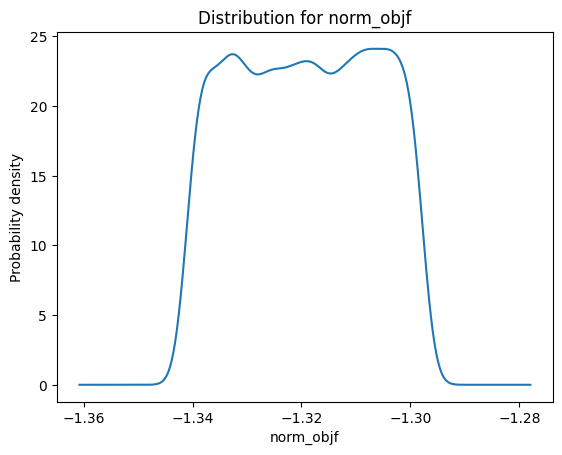

In [8]:
print("Plotting objective function distribution")
# Analyse a single output variable, vio_constr_res
results = campaign.analyse(qoi_cols=["norm_objf"])

# Get its distribution
dist = results.get_distribution(qoi="norm_objf")

# Locations for density function to be evaluated
x = np.linspace(dist.lower[0], dist.upper[0], num=500)
pdf = dist.pdf(x)

# Plot
fig, ax = plt.subplots()
sns.lineplot(x=x, y=pdf, markers=True, ax=ax)
ax.set_title("Distribution for norm_objf")
ax.set_xlabel("norm_objf")
ax.set_ylabel("Probability density")
# fig.savefig("objf_dist.png")

## Sobol indices

### Violated constraint residuals

Sobols for violated constraint residuals.

Plotting Sobols for violated constraint residuals.


/home/jon/anaconda3/envs/easyVVUQ-process/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


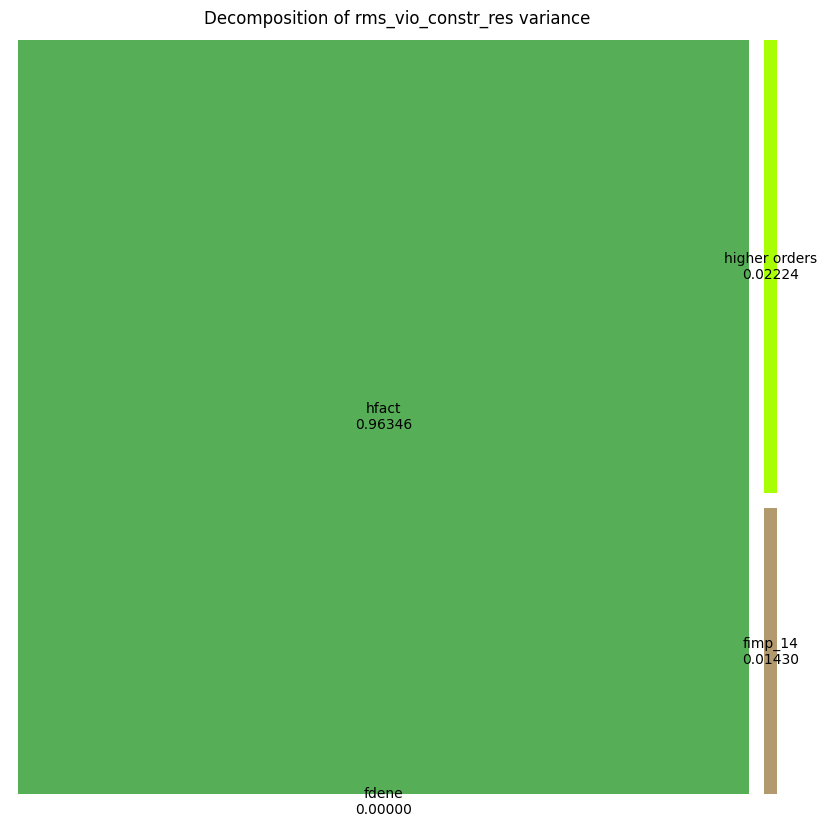

In [9]:
print("Plotting Sobols for violated constraint residuals.")
results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])
fig, ax = plt.subplots()
results.plot_sobols_treemap("rms_vio_constr_res", figsize=(10, 10), ax=ax)
# Can get a ZeroDivisionError in plot_sobols_treemap() if a Sobol index is 0
# fig.savefig("vio_constr_res_sobols_treemap.png")

### Sobols for individual constraint

Interesting for discussion, but not for poster. Too much information (Sobol indices for each constraint).

Plotting individual constraint Sobols
Plotted eq_con002 Sobols.
Plotted eq_con001 Sobols.
Plotted eq_con011 Sobols.


/home/jon/anaconda3/envs/easyVVUQ-process/lib/python3.10/site-packages/easyvvuq/analysis/results.py:417: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


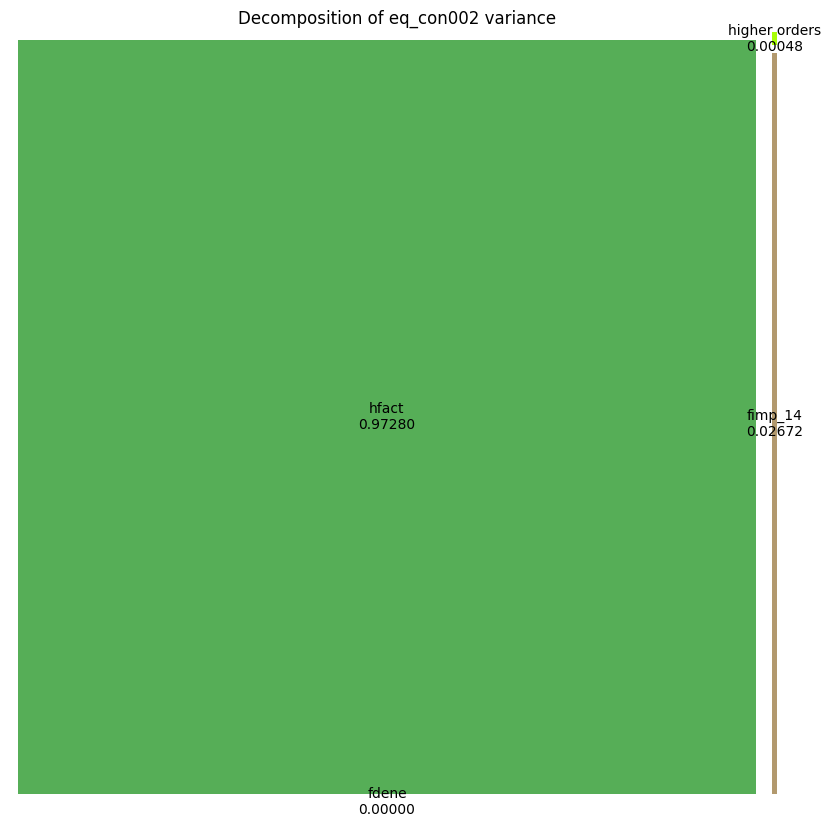

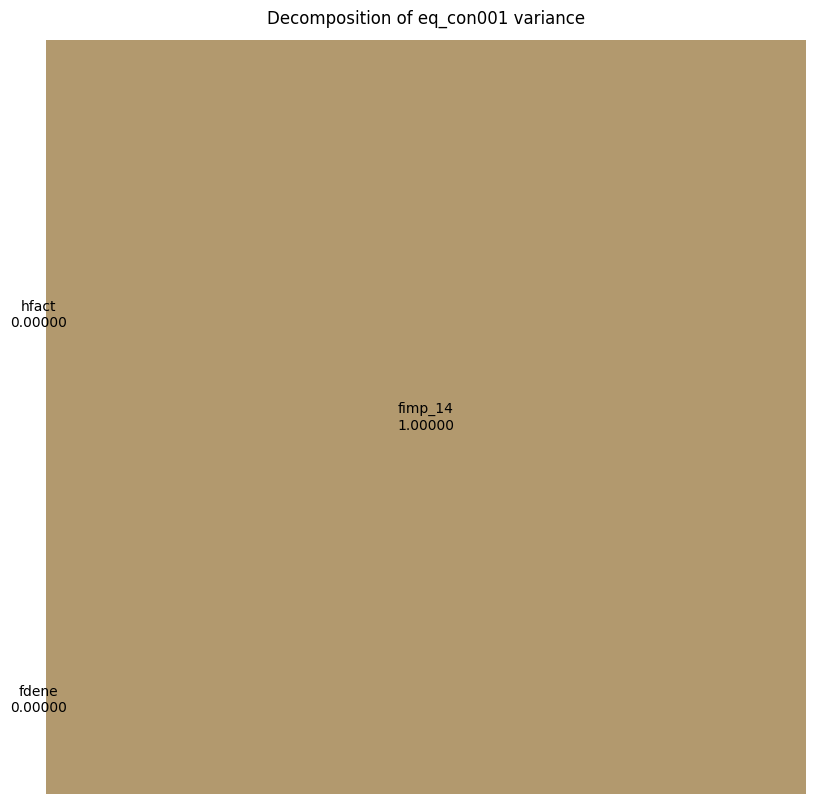

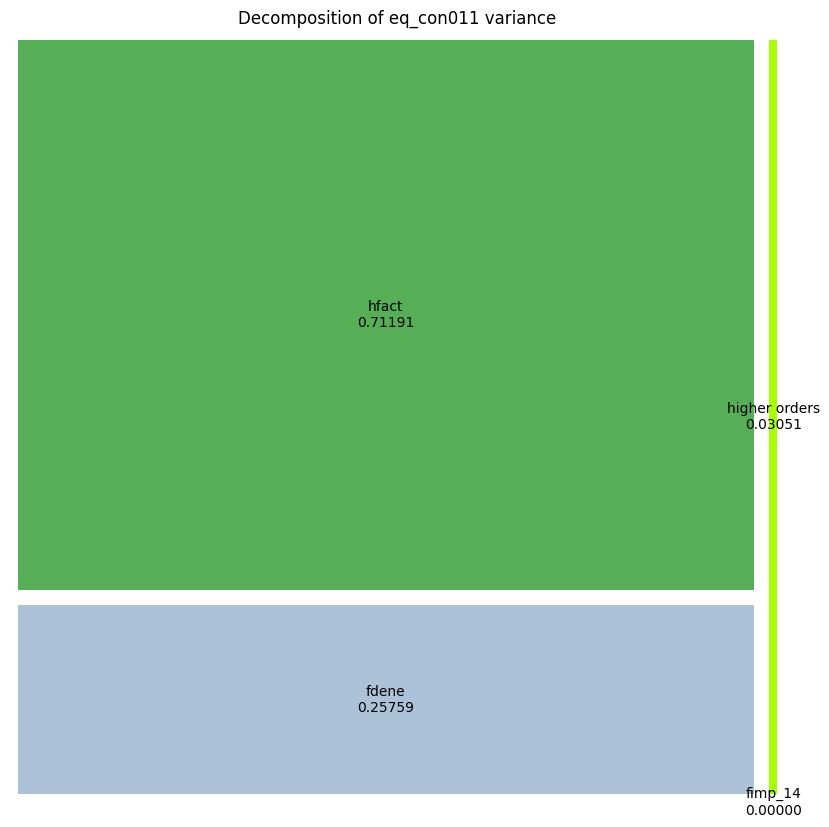

In [10]:
print("Plotting individual constraint Sobols")
results = campaign.analyse(qoi_cols=top_vio_means)
for constr_name in top_vio_means:
    fig, ax = plt.subplots()
    try:
        results.plot_sobols_treemap(constr_name, ax=ax)
        # fig.savefig(f"{constr_name}_sobols_treemap.png")
        print(f"Plotted {constr_name} Sobols.")
    except:
        print(f"Couldn't plot {constr_name} Sobols.")

## Barplot of Sobol indices

Plotting barplot of Sobols for violated constraint residuals.


Text(0, 0.5, 'Uncertain input')

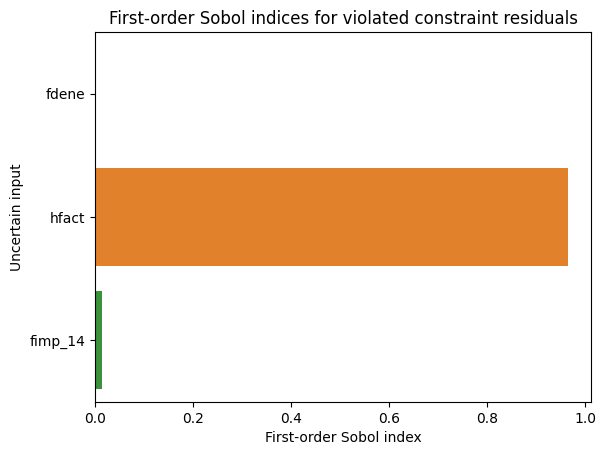

In [11]:
print("Plotting barplot of Sobols for violated constraint residuals.")
# results.sobols_first()
# results.sobols_second()
# results.sobols_total()

results = campaign.analyse(qoi_cols=["rms_vio_constr_res"])
sobols_first = results.sobols_first()["rms_vio_constr_res"]
sobols_first_df = pd.DataFrame(sobols_first)
sobols_first_df_melted = sobols_first_df.melt()
sobols_first_df_melted

fig, ax = plt.subplots()
sns.barplot(data=sobols_first_df_melted, x="value", y="variable", ax=ax)
ax.set_title("First-order Sobol indices for violated constraint residuals")
ax.set_xlabel("First-order Sobol index")
ax.set_ylabel("Uncertain input")
# fig.savefig("fo_sobols_bar.png")

Plotting first and higher-order Sobols for violated constraint residuals.


Text(0, 0.5, 'Uncertain input')

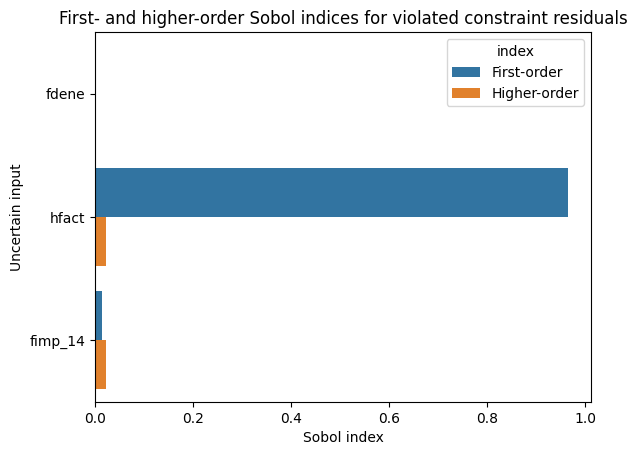

In [12]:
print("Plotting first and higher-order Sobols for violated constraint residuals.")
sobols_total = results.sobols_total()["rms_vio_constr_res"]

# Calculate higher-order Sobol indices
sobols_higher = {}
for key in sobols_first:
    sobols_higher[key] = sobols_total[key] - sobols_first[key]

# Combine first and higher-order into df
sobols_first_and_higher = {}
for key in sobols_first:
    sobols_first_and_higher[key] = [sobols_first[key][0], sobols_higher[key][0]]

sobols_first_and_higher_df = pd.DataFrame(
    sobols_first_and_higher, index=["First-order", "Higher-order"]
)
sobols_first_and_higher_df = sobols_first_and_higher_df.reset_index()
sobols_first_and_higher_df
sobols_first_and_higher_df_melted = sobols_first_and_higher_df.melt(id_vars="index")
sobols_first_and_higher_df_melted

# Plot
fig, ax = plt.subplots()
ax = sns.barplot(
    data=sobols_first_and_higher_df_melted,
    x="value",
    y="variable",
    hue="index",
    orient="h",
)
ax.set_title("First- and higher-order Sobol indices for violated constraint residuals")
ax.set_xlabel("Sobol index")
ax.set_ylabel("Uncertain input")
# fig.savefig("fo_ho_sobols_bar.png")